# Homework 6: Logistic Regression

In this homework we will implement the Logistic Regression algorithm using Gradient Descent.

We use as reference the chapter 9 and 24 of Understanding Machine Learning.

Copy this notebook and insert the corresponding names on the file.


## Important!


1.   **You shall send this TP by mail with the subject: [HW6][Student_1][MICAS][Student_2][SI221]** (Adapt the subject accordingly to your specific situation).

2.   **This exercise can be done in pairs. Please, leave all of your answers on this notebook, which will be the only file you will have to deliver.**

3. **You have one week to deliver the homework.**

4. **Comment your code. If you leave an algorithm unfinished or you believe it may have a problem handling specific cases, we will consider this for evaluation.**

5. **We strongly encourage discussion between students as long as you own your solution. Copy pasting the solution from internet/colleagues will not be tolerated.**

 
**Send your solutions to both mails:**

<code>breno.skuk@gmail.com<br>
ibrahim.djemai@telecom-sudparis.eu</code>

(Feel free to send an email if you have any question concerning the TP)

**Good luck!**


Lais Isabelle Alves dos Santos

Louis Chanaron

# Part 1: From theory to algorithm
## Logistic Regression in a nutshell

Here we will take a look into the Logistic Regression algorithmic paradigm used for binary classification. 

Moreover, the hypothesis class does not output the label directly, but it's maximum a posteriori likelihood (a value in the interval $[0,1]$). 

This method can be "seen" either by the machine learning point of view as well as from the statistcal point of view.

<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/sigmoid_graph.png" width=400/>

**Figure 1** : Sigmoid Function. 

Let us define the logistic function $\sigma: \mathbb{R} → [0,1]$ (also known as sigmoid, see **Figure 1**) as follows:

$$\sigma(x) = \frac{e^{x}}{1+e^{x}} = \frac{1}{1+e^{-x}} = 1 - \sigma(-x) \tag{1}$$

Given a set of input data from $X \in \mathbb{R}^d$, and their corresponding labels from $Y \in \{0, 1\}$, the goal of Logistic Regression is to map the input $X$ via a Hypothesis function $\mathcal{h}_W$ with parameters $W$ to $Y$. 

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$: 

$$\mathcal{H}_W = \{x \mapsto \sigma(\langle W, x \rangle ): W \in \mathbb{R}^d \}$$

such that for $\mathcal{h}_W \in \mathcal{H}_W$ we write

$$ \mathcal{h}_W:X \in \mathbb{R}^d → [0, 1]$$

$$\mathcal{h}_W(x) = \sigma(\langle W \cdot X \rangle)$$

Where $\sigma:x \in \mathbb{R} → [0, 1]$ is the **sigmoid** or the **logistic** function, as previously defined in $(1)$.


An interesting property of the $\sigma$ function that partly motivates its use is given by it's derivative, as expressed below:

\begin{align} \tag{2}
\sigma'(x) &= \frac{d}{dx} \frac{1}{1+e^{-x}} \\
&= \frac{-1}{(1+e^{-x})^2} (-e^{-x}) \\ 
&= \frac{1}{1+e^{-x}} \cdot \big(\frac{e^{-x}}{1+e^{-x}}\big)\\
&= \sigma(x) \cdot \sigma(-x)\\
&= \sigma(x) (1-\sigma(x)) 
\end{align}

## Prediction

Notice that the hypothesis class $\mathcal{H}_W$ does not contain functions that map the input to $\{0,1\}$, but instead to the interval $[0,1]$. 

We will show in the following section the probabilistic interpretation of this hypothesis class, and motivate the following labeling rule:

$$
    y_{pred}= 
\begin{cases} \tag{3}
    1 & \text{if } \mathcal{h}_W(x) \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
$$

Note in view of Figure 1 that when $\langle W \cdot X \rangle$ is very large then $\sigma(\langle W \cdot X \rangle)$ is close to 1, whereas if
$\langle W \cdot X \rangle$ is very small then $\sigma(\langle W \cdot X \rangle)$ is close to 0. 

Remember that $\langle W \cdot X \rangle$ is was precisely the distance of $x$ to a hyperplane corresponding to $W$.
There is a resemblance on how we performed the prediction on the perceptron and SVM, where we based our analisys by studying  $sign(\langle W \cdot X \rangle)$.  

However, our halfpsace prediction was being performed with $\{-1,1\}$ labels whereas now we are working with $\{0,1\}$

## Probabilistic Model
Let $S^N = (x_i,y_i)_{i\in[N]} \overset{\mathrm{iid}}{\sim} (X,Y)^N$ be a training set with $N$ samples. 

If we assume that:
$$ p(y_i = 1 | x_i, W) = \mathcal{h}_W(x_i) $$
$$ p(y_i = 0 | x_i, W) = 1 - \mathcal{h}_W(x_i) $$

We can write the equations above compactly as:

$$ p(y_i | x_i, W) = (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \tag{4}$$

We can write the likelihood of the parameters as product of the likelihood for each point as follow (where we make use of the $\mathrm{iid}$ sampling):

\begin{align}
L(W) &= p(Y^N | X^N, W)\\
&= \prod^N_{i=1} p(y_i | x_i, W) \\
&= \prod^N_{i=1} (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \\ \tag{5}
\end{align}

This is the well established statistical problem of finding a Maximum Likelihood Estimator, and we write the optimization as:

$$
W = arg \max_{W' \in \mathbb{R^d}} L(W') \tag{6}
$$


We can conviniently write an equivalent optimization problem by maximizing the log likelihood. This is possible because $log$ is a monotonically increasing function:

\begin{align} \tag{7}
\mathcal{L}(W) &= \log L(W) \\
&= \sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1-y_i) \log(1-\mathcal{h}_W(x_i))
\end{align}

The parameter $W$ is then given by:

$$
W = arg \max_{W' \in \mathbb{R^d}} \mathcal{L}(W')  \tag{8}
$$

To solve the maximization problem, we use **gradient ascent**. Written in vectorial notation, our updates will therefore be given by $W ← W + lr \cdot \nabla_W \mathcal{L}(W)$. (Note the positive rather than negative sign in the update formula, remember that we’re maximizing, rather than minimizing a function now)

With the change of representation of $x_i$ to facilitate the notation:
$W = [w_1, w_2, ..., w_j, ..., w_d], \quad x_i = [x_1^{(i)}, x_2^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}]$

For any given sample, the gradient of the logistic loss function with respect to $W$ is given by :
$$\nabla \mathcal{L}(W) = \left[\frac{\partial \mathcal{L}(W)}{\partial w_1}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_j}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_d}\right] $$

The derivative of the likelihood with respect to a single coordinate can be easily obtained by using $(2)$ as:

$$ \frac{\partial}{\partial w_j} \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1}\left(y^{(i)}-\mathcal{h}_W(x^{(i)})\right) x_j^{(i)}$$

For each coordinate we have:

$$\nabla \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) \cdot\left[x_1^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}\right] = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) x^{(i)} $$

Finally, the gradient ascent step is given by:

$$ W^{(t+1)} ← W^{(t)} + lr \cdot \frac{1}{N} \sum^N_{i=1} \left(y_i-h_W(x_i)\right) x_i$$

## Question 1: 
(a) In the deduction above we atack the problem of learning through data from the statistical point of view. 

Usually, in machile learning we would choose a loss function $l_{logistic}$, write the Empirical Risk as the average value of the loss, and finally verify that for our $\mathcal{H}_W$,  $\mathcal{h}_W \in ERM_{h_W' \in \mathcal{H}_W} (\mathcal{L}(\mathcal{h}'_W))$ is minimizing the true Risk. 

Can you spot the analogous to the loss function in $(7)$? Can this problem be made equivalent to a binary classification into $\{-1,1\}$?

(b) Discuss the similarities between linear regression and logistic regression. What types of problems are the most appropriate for them? Are they equivalent in some way?

**ANSWER (A):** \\
The Empirical risk can be represented as: 

$$R_{emp} = \frac{1}{N} \sum^N_{i=1}\log L(W)$$

It is possible to prove that the hypothesis class being part of the $ERM$ is the minimization of the true risk, because the minimization of the empirical risk takes into account the training set. Instead, the true risk takes into account the test set - how the algorithm work in practice - which leaves to the conclusion that they belong to each other, since they are part of the same distribution. 

The loss function for the logistic regression is given by: 
\begin{align}
\mathcal{L}(W) &= \sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1-y_i) \log(1-\mathcal{h}_W(x_i))
\end{align}

Because in that case, the goal was to maximize the likelihood function. But, it is possible to find an analogous loss function by thinking in minimizing the error of the predictions. In this case, the equation could be given by: 
\begin{align}
\mathcal{L}(W) &= -\frac{1}{N} \sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1-y_i) \log(1-\mathcal{h}_W(x_i))
\end{align}

It is possible to model the logistic regression between $\{-1, 1\}$, but considering a similar function of the sigmoid function, the Tanh. She is more stretched, but she has a similar behavior. 

**ANSWER (B):** \\
The linear regression, as seen in Perceptron and in the Support Vector Machine (SVM), is a good classifier, but it tough has its limitations. For instance, if a dataset has a too distributed data, somehow we may have a misclassification, i.e. some data can be on the other side of the calculated hyperplane.

However, it is possible to see similarities between the linear regression and the logistic regression. One point that is valid to be discussed is the fact that both methods use the distance of $x$ from the hyperplane $W$ to calculate the best approximation. In the case of linear regression, the best hyperplane, and in the caso of logistic regression, the maximum likelihood function. 

The best problems for logistic regression are those who envolve "Classification", to predict whether a variable is true or false, 0 or 1. One example of use would be the classification of the chest x-ray images to predict the state of a patient, telling if he/she is suffering from pneumonia or not, using the "Chest X-Ray Images (Pneumonia)" Dataset.

In the case of linear regression, the outcome is mostly a continuous data, for instance, the prediction of the final grade of students given the four last years grades. 

The equivalence between them is that both are types of Supervised Learning in the Machine Learning area. Namely, they learn from a labeled dataset and then can predict and classify test data correctly. 

## Question 2:
Fill out the code snippets below to implement the Logistic Regression and test its results

In [ ]:
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression as OLS

from urllib import request
import pandas as pd
from seaborn import heatmap

### Compute the logistic (also known as sigmoid) function

In [ ]:
def sigmoid(u):
  """
  Compute the sigmoid 

  Parameters:
  -----------
  `u` : real number


  Returns:
  --------
  `sigma` : Computed sigma(u)
  
  """
  res = 1/(1+np.exp(-u))
  
  return res

### Compute the cost and its gradient using previously defined equations

In [ ]:
def getCost(W, X, Y):
  """
  Compute the cost

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `J` : Computed cost
  
  """
  
  res = np.mean(-Y*np.log(sigmoid(W@X))-(1-Y)*np.log(1-sigmoid(W@X)))
  return res

def getGradients(W, X, Y):
  """
  Compute the cost gradients

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  
  Returns:
  --------
  `dJ` : Computed gradients
  
  """
  return np.mean((Y - sigmoid(W@X))*X, axis=1)

### Perform a Gradient Descent Step

In [ ]:
def gradDescent(W, X, Y, lr):
  """ 
  Update the weights with gradient descent 
  
  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lr` : Learning Rate

  Returns:
  --------
  `W` : Updated weights [d x 1]
  
  """
  W = W + lr*getGradients(W, X, Y)
  
  return W

### Logistic Regression functions for training and testing

In [ ]:
def logRegTrain(X, Y, lr=0.1, maxEpochs=25, minCostDiff=1e-4, W = np.array([0, 0, 0])[:np.newaxis]):
  """ 
  Train the Logistic Regression Model
  
  Parameters:
  -----------
  `X` : Training inputs [d x N]
  `Y` : Training Labels [1 x N]
  `lr` : Learning Rate
  `maxEpochs` : Maximum number of epochs before stopping the training
  `minCostDiff` : Minimum cost difference

  Returns:
  --------
  `W` : Trained weights [d x 1]
  
  """
  Js = []
  
  # Randomly initialze the weights
  eps = minCostDiff
  k = 0
  m = len(Y)
  
  converged = False # Boolean variable for convergence critereon

  while k < maxEpochs:
    # Update the weights
    W = gradDescent(W, X, Y, lr)
    # Check if the convergence critereon is met
    J = getCost(W, X, Y)
    k+=1

    Js += [J]

  return W, Js

In [ ]:
def logResTest(W, X, Y):
  """ 
  Test the SVM Model
  
  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Testing inputs [d x N]
  `Y` : Testing Labels [1 x N]

  Returns:
  --------
  `l01` :L_0_1 Loss
  `P` : Precision
  `R` : Recall 
  
  """
  J = getCost(W, X, Y)

  yPred = np.clip(sigmoid(W@X)>0.5, 0, None)
  A = np.mean(np.abs(Y - yPred) < 10**-3) # how many times the ML model was correct overall
  P = np.sum(yPred[Y==1] == 1)/np.sum(yPred == 1) # how good is the model in predicting some category
  R = np.sum(yPred[Y==1] == 1)/np.sum(Y == 1) # how many times the model detected a specific category

  return J, A, P, R

### Plot the data and the results
Functions for :

- Getting the decision boundry from the weights and plotting it with the data.

- Cost function evolution.

In [ ]:
def plotData(W, X, Y):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]
    
  """

  X = X[1:3,:]

  x_min = np.min(X[0, :]) - 0.5
  x_max = np.max(X[0, :]) + 0.5
  y_min = np.min(X[1, :]) - 0.5
  y_max = np.max(X[1, :]) + 0.5

  X = X.T

  X0 = X[Y>0,:]
  X1 = X[Y == 0,:]

  plt.scatter(X1[:, 0], X1[:, 1], c='b')
  plt.scatter(X0[:, 0], X0[:, 1], c='r')

  x = np.array([x_min, x_max])

  if W[2] != 0:
    y = -x*W[1]/W[2]-W[0]/W[2]
    
    plt.plot(x, y, 'k-')
  else:
    plt.vlines(0, y_min, y_max)
  plt.xlim((x_min, x_max))
  plt.ylim((y_min, y_max))
  plt.show()

  return

def plotConvCurve(Js):
  """
  Plot the cost function evolution

  Parameters:
  -----------
  `Js` : Calculated costs at each epoch
  """
  N = [k for k in range(len(Js))]
  plt.plot(N, Js)
  plt.xlabel("Epoch")
  plt.ylabel("J")
  plt.show()
  return 

### Synthetic Data generation :
Consider a data set $\{x(n), d(n)\}^{200}_{n=1}$ consisting of $200$ points $x(n) = (x_1(n), x_2(n))$ and
their corresponding labels $d(n)$, such that the first $100$ points have label $d(n) = 1$ and
are generated according to a Gaussian distribution $x(n) ∼ \mathcal{N} ([1, 0] , \sigma^2
I)$, and such that
the other $100$ points have label $d(n) = 0$ and are generated according to a Gaussian
distribution $x(n) ∼ \mathcal{N} ([0, -1] , \sigma^2
I)$.

In [ ]:
def genData(meanPos, meanNeg, sigma, N):
  """
  Generate synthetic data following the gaussian distribution

  Parameters:
  -----------
  `meanPos` : Mean for the Data with label d(n) = 1 [1 x 2]
  `meanNeg` : Mean for the Data with label d(n) = 0 [1 x 2]
  `sigmas` :  Standard deviation
  
  Returns:
  --------
  `X` : Input Data
  `Y` : Labels
    
  """
  X1 = rd.multivariate_normal(meanPos, sigma*np.eye(2), size=int(np.ceil(N//2)))
  X0 = rd.multivariate_normal(meanNeg, sigma*np.eye(2), size=(N//2))
  Y1 = np.ones(len(X1))
  Y0 = np.zeros(len(X0))

  X = np.concatenate((X0, X1))
  Y = np.concatenate((Y0, Y1))[:, np.newaxis]
  Z = np.concatenate((X, Y), axis=1)
  rd.shuffle(Z)
  X = Z[:, 0:2].T
  X = np.concatenate((np.ones(len(X[0]))[np.newaxis], X), axis=0) # X is in homogeneous coordinates
  Y = Z[:, 2]
  return X, Y

### Putting everything together
- Plot the data

- Train the Logistic Regression Model using variance $\sigma^2 = 0.25$ and $\sigma^2 = 0.05$

- Plot the convergence curve

- Plot the data with the decision boundary

- Test the Logistic Regression Model and show the accuracy, precision and recall figures

- Compare the results with the previsouly implemented Perceptron and SVM. Comment the results.

In [ ]:
def main(lr):
  """ 
  Main function for training and testing the SVM 
  
  Parameters:
  -----------
  `lr` : Learning Rate
  
  """
  sig2 = 0.25
  W = np.array([0, 0, 0], dtype="float64")[:, np.newaxis]
  X, Y = genData([1, 0], [0, -1], sig2, 100)
  Xtest, Ytest = genData([1, 0], [0, -1], sig2, 100)

  W, Js = logRegTrain(X, Y, lr, maxEpochs=50)
  J, A, P, R = logResTest(W, Xtest, Ytest)

  print("J:", J, "A:", A, "P:", P, "R:", R)
  plotConvCurve(Js)
  plotData(W, X, Y)
  return

(100,)
J: 0.23086713074384477 A: 0.94 P: 0.9583333333333334 R: 0.92


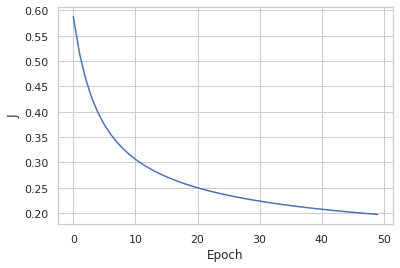

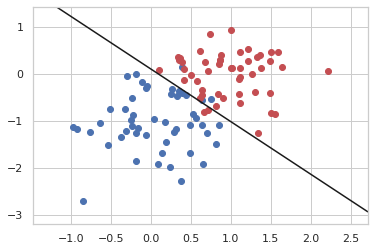

In [ ]:
# Your Hyperparameters
lr = 1
main(lr)

#### Comparing the results with Perceptron and SVM: 

As it is possible to see in the image above, the logistic regression is a good method to classify the data. Comparing with perceptron and svm, the separation of the data is very close, but the logistic regression take into account the probability of some data be in one side or another, instead of using deterministic conclusions.

[[-3.3686168   2.48835101]]
[0.0332908]


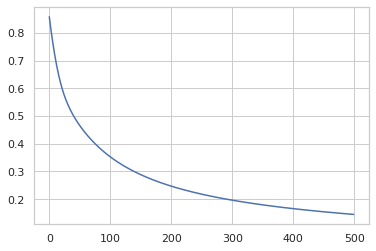

In [ ]:
#Example of 1 dimension training
W, Js = logRegTrain(np.array([[1, 1, 1, 1], [1, 2, 0, 3]]), np.array([0, 1, 0, 1]), W=np.array([[1, 1]]), maxEpochs=500)

plt.plot([k for k in range(len(Js))], Js)
print(W)
print(sigmoid(W@np.array([1,0])))
plt.show()

# Part 2: Dealing with categorical data

A categorical variable can take on values on a finite set of fixed possible values. Samples from categorical assign each element to a particular group or nominal category on the basis of some qualitative property. 

## Question 3:

Here you will predict the survival score of a passenger of the titanic disaster. 

You will choose the prediciton variables $x$ from the available options and apply logistic regression on it to regress the 'survival' variable.

Here we have two types of variables: Numerical and categorical. For instance, the passenger Age can be an integer $\in [0, 120]$. The passenger class, on the other hand, can only be represented by $3$ values. The passenger sex by $2$ values.


Below are the functions that are downloaded and preprocess the data. 


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

gdd.download_file_from_google_drive(file_id='1zilQH06ud0nzmmqLUwCnwDHdJkNICBU4',
                                    dest_path='./titanic/data.zip',
                                    unzip=True)
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# preprocess data

train.drop("Cabin",inplace=True,axis=1)
test.drop("Cabin",inplace=True,axis=1)

train = train[train['Age'].notna()]
test = test[test['Age'].notna()]

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

test['Fare'].fillna(test['Fare'].mean(),inplace=True)

Categorical Values:

Training data shape:  (714, 11)


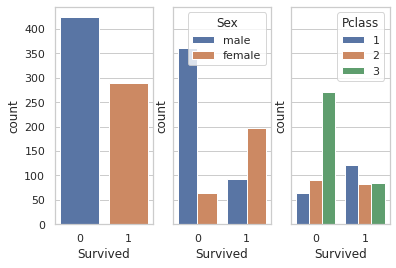

In [ ]:
print('Training data shape: ', train.shape)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x = 'Survived',data = train, ax = ax1)
sns.countplot(x = 'Survived',hue = 'Sex',data = train, ax = ax2)
sns.countplot(x = 'Survived',hue = 'Pclass',data = train, ax = ax3)

plt.show()

**Up to you**

Apply logistic regression on the training data to predict if a passenger survived or not given the variables of your choosing. A possible approach is to encode the categorical variables in an appropriate way such that logistic regression can be applied. .

Justify your choices and validate your results using the corresponding Testing set!

Please, don't "waste" time finetuning your model, this is not a competition. Always remember that we just want to evaluate your understanding of the problem and theory.

In [ ]:
# training and testing set
x = np.array(train['Sex'].to_numpy() == 'female', dtype='float')         # using the age to predict
y = train['Survived'].to_numpy()

x_test, x_train = x[:200, ], x[200:x.shape[0], ]
y_test, y_train = y[:200, ], y[200:x.shape[0], ]

x_train = np.array([x_train])
x_train = np.concatenate((np.ones(len(x_train[0]))[np.newaxis], x_train), axis=0)
x_test = np.array([x_test])
x_test = np.concatenate((np.ones(len(x_test[0]))[np.newaxis], x_test), axis=0)
y_test = np.array(y_test)
y_train = np.array(y_train)

lr = 0.01
W, Js = logRegTrain(x_train, y_train, lr, maxEpochs=5,  W = np.zeros(x_train.shape[0])[:np.newaxis])
J, A, P, R = logResTest(W, x_test, y_test)
print("J:", J, "A:", A, "P:", P, "R:", R)

y_pred_train = np.clip(sigmoid(W@x_train)>0.5, 0, None)
y_pred_test = np.clip(sigmoid(W@x_test)>0.5, 0, None)

J: 0.6922381991913181 A: 0.805 P: 0.7101449275362319 R: 0.7205882352941176


As it is possible to see in the results above, the prediction accuracy of the method is good, 80%. The algorithm could predict the labels for the women who could be saved in the titanic ship. 

Print the Confusion matrix of your prediction

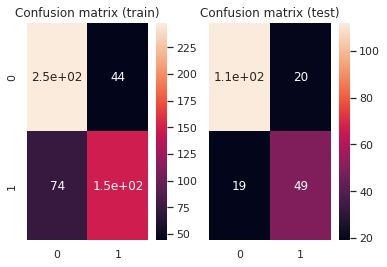

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Get the confusion matrix
cf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot with sns
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.heatmap(cf_matrix_train, annot=True, ax = ax1).set(title='Confusion matrix (train)')
sns.heatmap(cf_matrix_test, annot=True, ax = ax2).set(title='Confusion matrix (test)')

plt.show()

# Part 3: Linear Regression for Housing Prices prediction

Linear regression is a common statistical tool for modeling the relationship between some “explanatory” variables and some real valued outcome.

The hypothesis class of linear regression predictors is simply the set of linear
functions:

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$: 

$$\mathcal{H}_W = \{x \mapsto \langle W, x \rangle : W \in \mathbb{R}^d \}$$

A common loss function is the squared loss:

$$
l_{mse}(h,(x, y)) = (h(x) − y)^2
$$

The corresponding empirical risk function is called the Mean Squared
Error, namely, 

$$\mathcal{L}_S(h) = \frac{1}{m} \sum^N_{i=1}(h(x_i) - y_i)^2
$$

There are different loss functions and different optimization techniques to obtain an empirical risk minimizer, if appropriate. 

Here you will use linear regression as offered by sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Data is found in the Kaggle website : https://www.kaggle.com/datasets/vedavyasv/usa-housing

## Question 4: 
- Load the data
- Remove the last column (address)
- Plot the correlation matrix for the data, in order to see how the variables are correlated with each other. Comment the result.
- Split the data into a training set and a test set (75/25)
- Predict the price of houses with linear regression model.
- Compute the mean absolute error of the test set.
- Plot the actual price of the test data set versus its prediction. Comment the results.


In [ ]:
# Download and process the data : 
import zipfile
with zipfile.ZipFile("USA_Housing.zip", 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
df = pd.read_csv("data/USA_Housing.csv").drop(labels='Address', axis=1)
print(df.keys())

In [ ]:
data = df.to_numpy()
data = np.array(data, dtype='float')
keys = df.keys()
keys = keys

[]

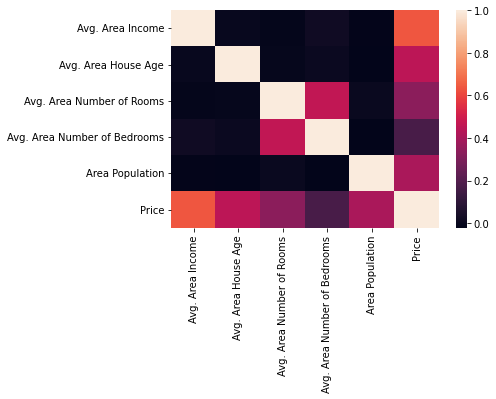

In [ ]:
heatmap(df.corr())
plt.plot()

Price is very correlated to all the other features, which is very consistent. In addition, we can see that there is a strong correlation between the average number of rooms and bedroom.

In [ ]:
frac = 0.75
rows = [k for k in range(len(data))]
rd.shuffle(rows)
X_train = data[rows[:int(frac*len(data))], :len(data[0])-1]
y_train = data[rows[:int(frac*len(data))], len(data[0])-1]
X_test = data[rows[:int((1-frac)*len(data))], :len(data[0])-1]
y_test = data[rows[:int((1-frac)*len(data))], len(data[0])-1]

In [ ]:
ols = OLS().fit(X_train, y_train)
y_pred = ols.predict(X_test)
acc = np.mean(np.abs(y_pred-y_test))
print("Scale of prices:", np.mean(np.abs(y_pred)))
print("Absolute mean square error:", acc)

Scale of prices: 1227010.7410576153
Absolute mean square error: 81108.67981156248


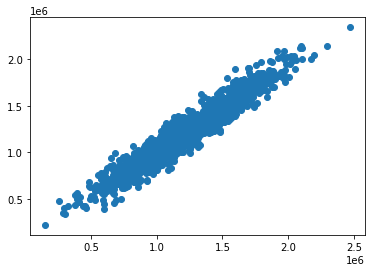

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

Our model is quite efficient to predict the correct price. The mean error is small compared to the mean value of price. In addition, the error does not seem to blow up for some values.

## References :
- Chapter 9 of the book : Understanding Machine Learning

## Other references: 
- [Linear vs Logistic Regression](https://www.kdnuggets.com/2022/03/linear-logistic-regression-succinct-explanation.html)

- [Log Loss-The cost function used in Logistic Regression](https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/#:~:text=The%20cost%20function%20used%20in%20Logistic%20Regression%20is%20Log%20Loss.)

- [Introduction to Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)

- [Activation Functions](https://www.baeldung.com/cs/sigmoid-vs-tanh-functions)